<a href="https://colab.research.google.com/github/PythonPixiePikachu/DataScienceFinalProject/blob/main/Image_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyarrow

In [ ]:
!pip uninstall pyarrow

Found existing installation: pyarrow 16.1.0
Uninstalling pyarrow-16.1.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pyarrow-16.1.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pyarrow/*
Proceed (Y/n)? y
  Successfully uninstalled pyarrow-16.1.0


In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

In [2]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.2 MB/s eta 0:00:00


In [3]:
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 54.7 MB/s eta 0:00:00


In [1]:
from google.colab import drive
import os
from matplotlib import pyplot as plt
import pandas as pd
import random
import cv2
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from textwrap import wrap
import pyarrow.parquet as pq

In [2]:
!pip install transformers datasets evaluate -q
!pip install jiwer -q

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
base_path = '/content/drive/MyDrive/Flikr_dataset/'
img_path = os.path.join(base_path, 'Images')
img_file_names = os.listdir(img_path)
img_file_dir = [os.path.join(img_path, file_name) for file_name in img_file_names]

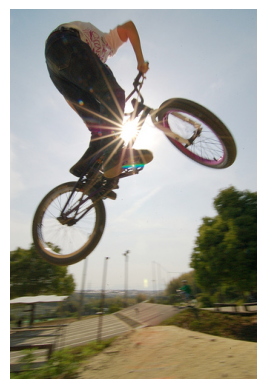

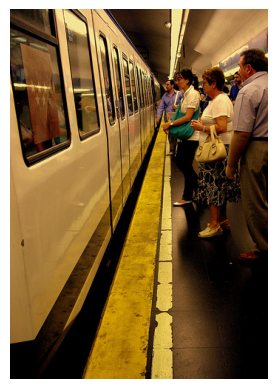

In [ ]:
for i,img in enumerate(random.sample(img_file_dir, 2)):
  img = cv2.imread(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [5]:
df_captions = pd.read_csv('/content/drive/MyDrive/Flikr_dataset/captions.txt', sep=',', header=0)
df_captions

image  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40450   997722733_0cb5439472.jpg   
40451   997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   

                                                 caption  
0      A child in a pink dress is climbing up a set o...  
1                  A girl going into a wooden building .  
2       A little girl climbing into a wooden playhouse .  
3      A little girl climbing the stairs to her playh...  
4      A little girl in a pink dress going into a woo...  
...                                                  ...  
40450           A man in a pink shirt climbs a rock face  
40451           A man is rock climbing high in the air .  
40452  A person in a red shirt climbing up a rock fac...  
40453                    A rock climber in a red shirt .  
40454  A rock climber practices on a rock climbing wa...  

[40455 rows x 2 columns]

In [ ]:
print("Number of samples:", len(df_captions))
print("Number of unique image IDs:", df_captions["image"].nunique())
df_captions["caption"] = df_captions["caption"].apply(lambda x: x.lower())
print("Number of unique captions:", df_captions["caption"].nunique())

Number of samples: 40455
Number of unique image IDs: 8091
Number of unique captions: 40170


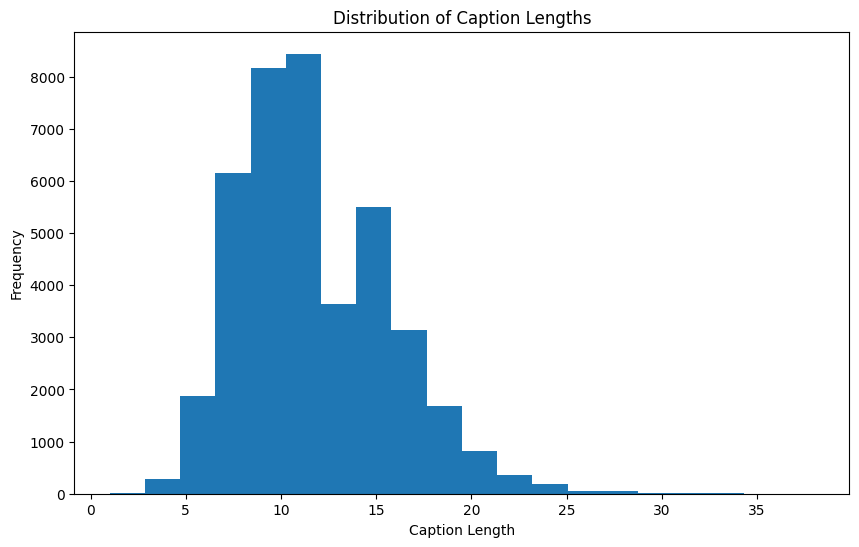

In [ ]:
length_captions = df_captions['caption'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
plt.hist(length_captions, bins=20)
plt.title('Distribution of Caption Lengths')
plt.xlabel('Caption Length')
plt.ylabel('Frequency')
plt.show()

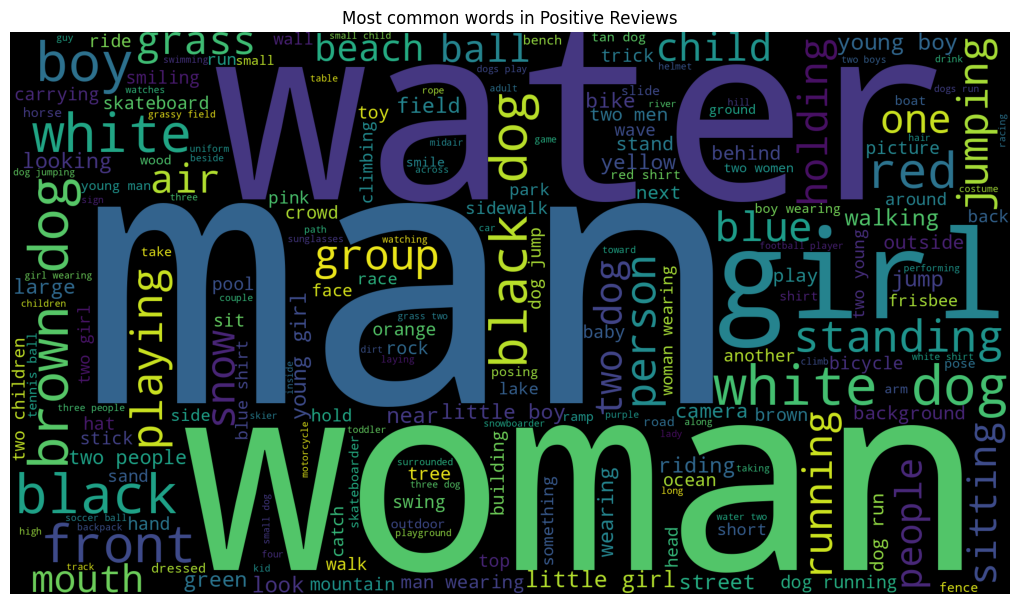

In [ ]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(df_captions.caption))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Most common words in Positive Reviews')
plt.show()

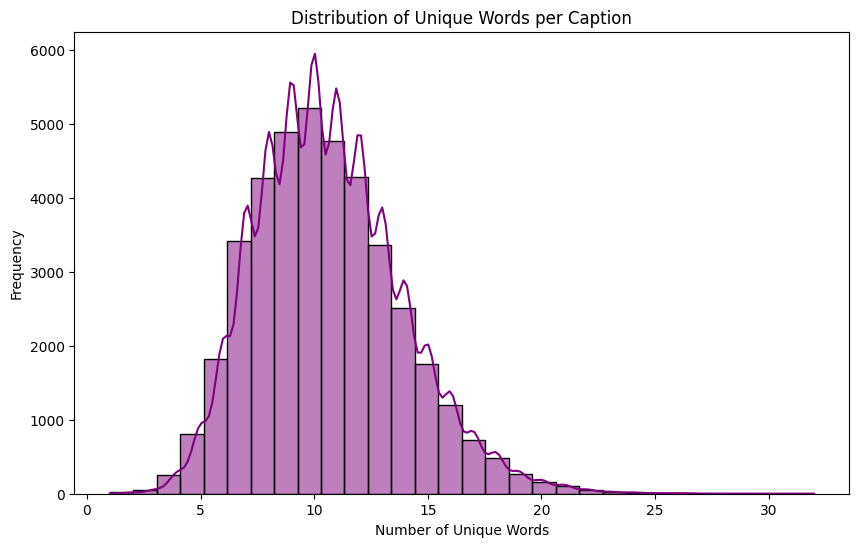

In [ ]:
unique_words_per_caption = [len(set(caption.split())) for caption in df_captions['caption']]

plt.figure(figsize=(10, 6))
sns.histplot(unique_words_per_caption, bins=30, kde=True, color='purple')
plt.title('Distribution of Unique Words per Caption')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.show()

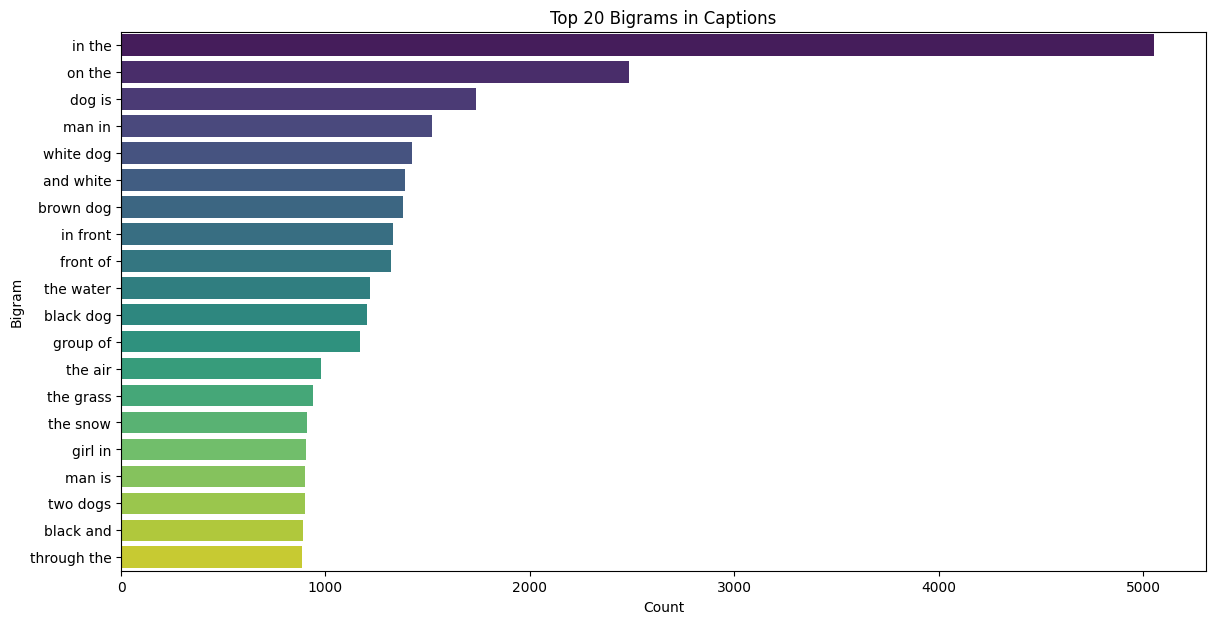

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(df_captions['caption'])

bigram_counts = X.sum(axis=0).A1
bigram_features = vectorizer.get_feature_names_out()


bigram_dist = pd.DataFrame({'bigram': bigram_features, 'count': bigram_counts})
bigram_df = bigram_dist.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(14, 7))
sns.barplot(x= 'count', y= 'bigram',data = bigram_df, palette='viridis', hue = 'bigram', legend = False)
plt.title('Top 20 Bigrams in Captions')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

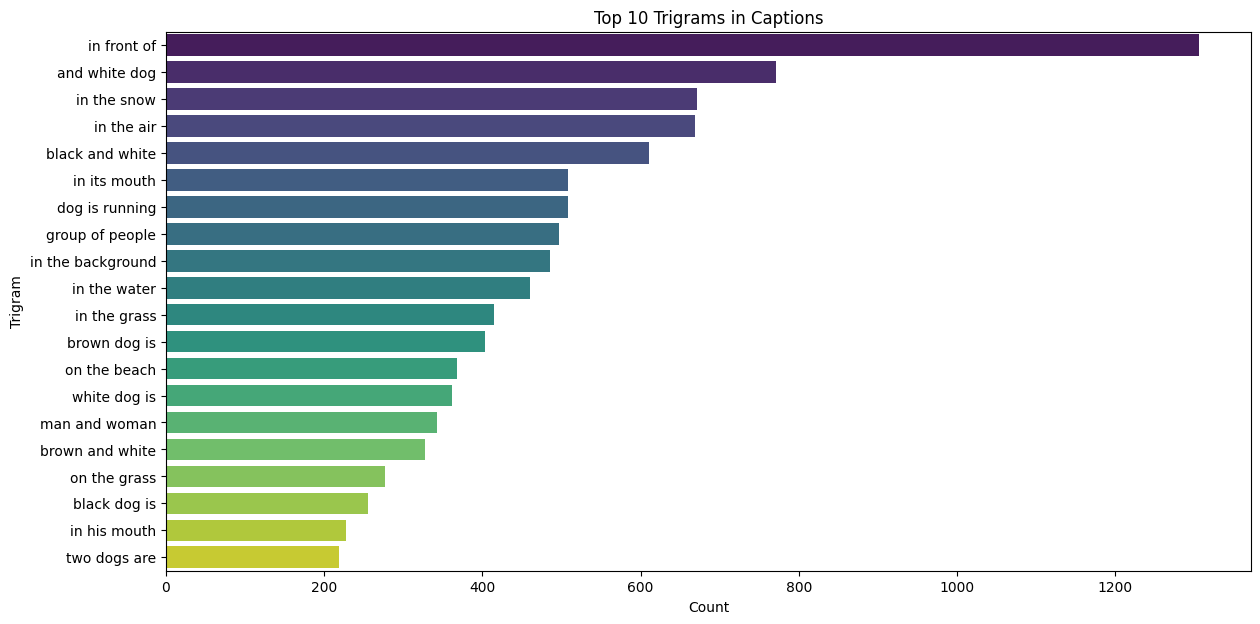

In [ ]:
vectorizer = CountVectorizer(ngram_range=(3, 3))
Y = vectorizer.fit_transform(df_captions['caption'])

trigram_counts = Y.sum(axis=0).A1
trigram_features = vectorizer.get_feature_names_out()


trigram_dist = pd.DataFrame({'trigram': trigram_features, 'count': trigram_counts})
trigram_df = trigram_dist.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(14, 7))
sns.barplot(x= 'count', y= 'trigram',data = trigram_df, palette='viridis', hue = 'trigram', legend = False)
plt.title('Top 10 Trigrams in Captions')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [ ]:
import albumentations as A

In [ ]:
Augmentaion_pipeline = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
    A.GaussianBlur(blur_limit=(3, 7), p=0.5)
    ])

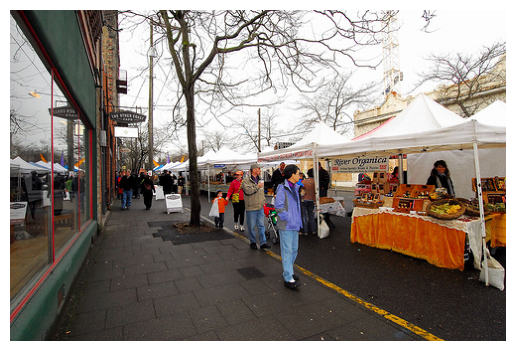

In [ ]:
plt.imshow(cv2.cvtColor(cv2.imread(img_file_dir[4]),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
augmented_images = []
for img in img_file_dir:
  aug = Augmentaion_pipeline(image = cv2.imread(img))
  augmented_images.append(aug['image'])

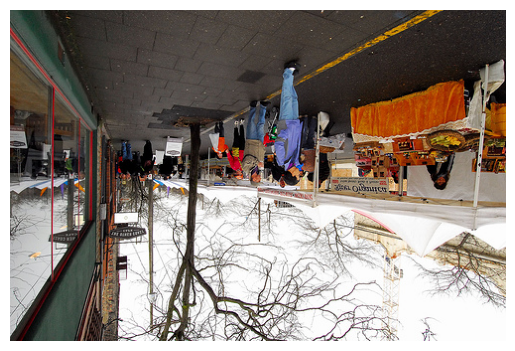

In [ ]:
plt.imshow(cv2.cvtColor(augmented_images[4], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
img_count = 1
for i,img in enumerate(augmented_images):
  if os.path.exists(os.path.join('/content/drive/MyDrive/Flikr_dataset/aug_images',img_file_names[i])):
    continue
  cv2.imwrite(os.path.join('/content/drive/MyDrive/Flikr_dataset/aug_images',f'augmented_{img_file_names[i]}'), cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  img_count += 1
print(img_count)

8102


In [ ]:
aug_image_name = []
aug_caption = []
for i,file in enumerate(img_file_names):
  aug_image_name.append(f'augmented_{file}')
  temp = df_captions[df_captions['image']==file]['caption']
  temp = temp.reset_index(drop=True)
  aug_caption.append(temp[0])

In [ ]:
temp_df = pd.DataFrame({'image':aug_image_name,'caption':aug_caption})
temp_df.head()

image  \
0   augmented_382701159_f98c1988cd.jpg   
1  augmented_3741827382_71e93298d0.jpg   
2  augmented_3730457171_e66dde8c91.jpg   
3   augmented_386470686_1ae9242878.jpg   
4   augmented_380515798_c2abbf46b0.jpg   

                                             caption  
0                        a man fishes in the ocean .  
1      a boy in a green shirt above something blue .  
2        a little girl rides a toy bike and laughs .  
3  a man crouched in the bare branches of a falle...  
4  a crowd walks along a sidewalk of a farmers ma...

In [ ]:
df_captions = pd.concat([df_captions,temp_df])
len(df_captions)

48546

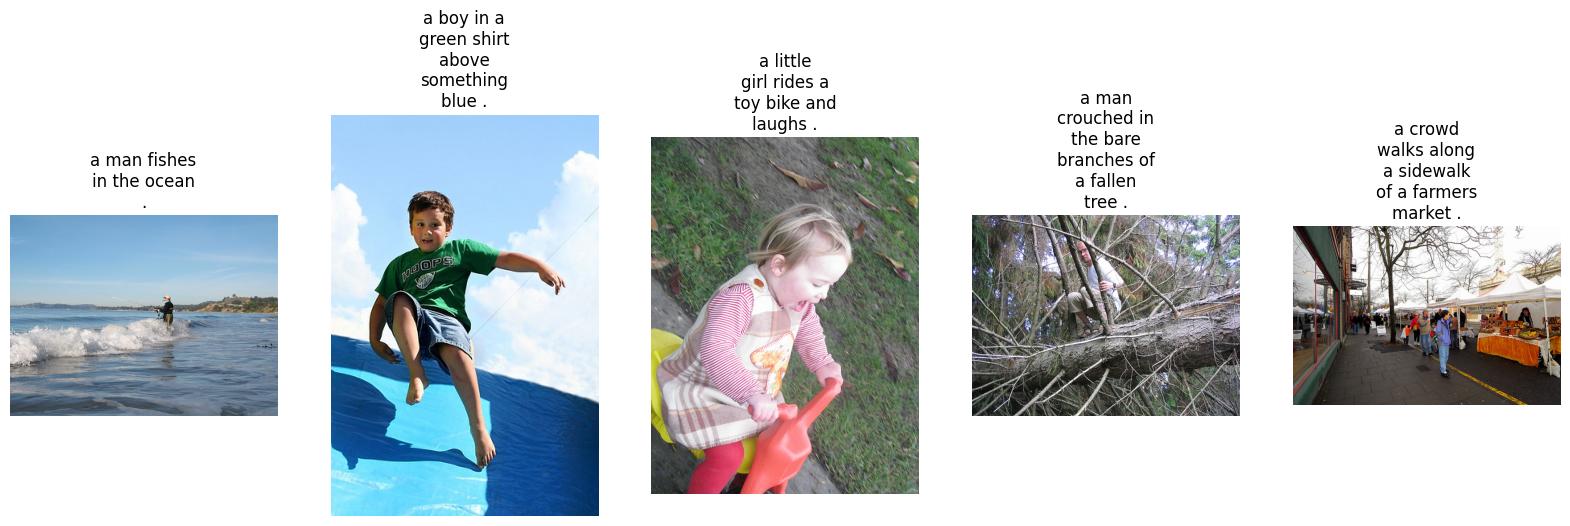

In [ ]:
images = img_file_dir[:5]
plt.figure(figsize=(20, 20))
for i,file in enumerate(img_file_names[:5]):
  ax = plt.subplot(1, len(images), i + 1)
  caption = df_captions[df_captions['image']==file]['caption'].reset_index(drop=True)[0]
  caption = "\n".join(wrap(caption, 12))
  plt.title(caption)
  plt.imshow(cv2.cvtColor(cv2.imread(images[i]),cv2.COLOR_BGR2RGB))
  plt.axis("off")

In [6]:
from datasets import load_dataset, DatasetDict, Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [5]:
from PIL import Image

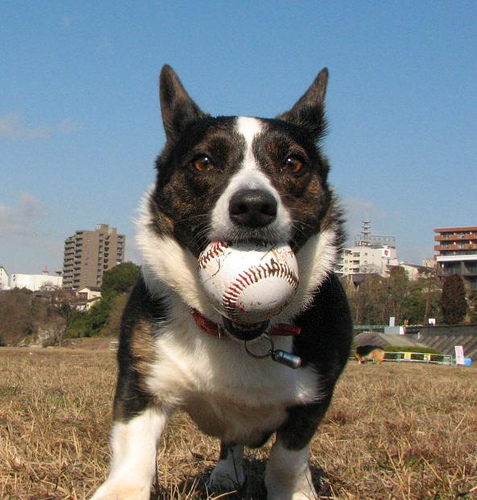

In [8]:
np_image = {}
for files in img_file_dir[:5000]:
  np_image[files]= Image.open(files)

In [9]:
len(np_image)

5000

In [10]:
data = {"image": [], "caption": []}
for i,img in enumerate(img_file_names[:5000]):
  data['image'].append(np_image[os.path.join(img_path, img)])
  data['caption'].append(df_captions[df_captions['image']==img]['caption'].reset_index(drop=True)[random.randrange(0, 5)])

In [ ]:
random.randrange(0, 5)

0

In [11]:
dataset = Dataset.from_dict(data)

In [22]:
dataset

Dataset({
    features: ['image', 'caption'],
    num_rows: 5000
})

In [12]:
train_test_split = dataset.train_test_split(test_size=0.1)
dataset = DatasetDict(train_test_split)

In [37]:
dataset['train']

Dataset({
    features: ['image', 'caption'],
    num_rows: 7281
})

In [ ]:
# from datasets import load_dataset

# dataset = load_dataset('/content/drive/MyDrive/Flikr_dataset')

Resolving data files:   0%|          | 0/8092 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [9]:
from transformers import AutoProcessor

checkpoint = "microsoft/git-base"
processor = AutoProcessor.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [14]:
# ds = dataset["train"].train_test_split(test_size=0.1)
train_ds = dataset["train"]
test_ds = dataset["test"]

In [15]:
def transforms(example_batch):
    images = [x for x in example_batch["image"]]
    captions = [x for x in example_batch["caption"]]
    inputs = processor(images=images, text=captions, padding="max_length")
    inputs.update({"labels": inputs["input_ids"]})
    return inputs


train_ds.set_transform(transforms)
test_ds.set_transform(transforms)

In [8]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained(checkpoint)

NameError: name 'checkpoint' is not defined

In [7]:
from evaluate import load
import torch

wer = load("wer")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predicted = logits.argmax(-1)
    decoded_labels = processor.batch_decode(labels, skip_special_tokens=True)
    decoded_predictions = processor.batch_decode(predicted, skip_special_tokens=True)
    wer_score = wer.compute(predictions=decoded_predictions, references=decoded_labels)
    return {"wer_score": wer_score}

In [4]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 8.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [5]:
!pip install accelerate>=0.21.0 -U

In [ ]:
!pip install -q transformers[torch] accelerate
import accelerate

In [21]:
from transformers import TrainingArguments, Trainer

model_name = checkpoint.split("/")[1]

training_args = TrainingArguments(
    output_dir=f"/content/drive/MyDrive/new/{model_name}",
    learning_rate=5e-5,
    num_train_epochs=50,
    fp16=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=2,
    save_total_limit=3,
    eval_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    save_steps=50,
    logging_steps=50,
    remove_unused_columns=False,
    label_names=["labels"],
    load_best_model_at_end=True,
)

In [22]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

In [23]:
trainer.train()

Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Unused or unrecognized kwargs: padding.


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


OutOfMemoryError: CUDA out of memory. Tried to allocate 3.87 GiB. GPU 

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [19]:
trainer.save_model('/content/drive/MyDrive/new/100_model')

In [ ]:
dataset['train'].features['label'].names

['Images', 'aug_images']

In [6]:
image = Image.open('/content/drive/MyDrive/aug_images/augmented_390671130_09fdccd52f.jpg')
device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

NameError: name 'torch' is not defined

In [26]:
/content/drive/MyDrive/aug_images/augmented_390671130_09fdccd52f.jpg

'/content/drive/MyDrive/Flikr_dataset/Images/390671130_09fdccd52f.jpg'

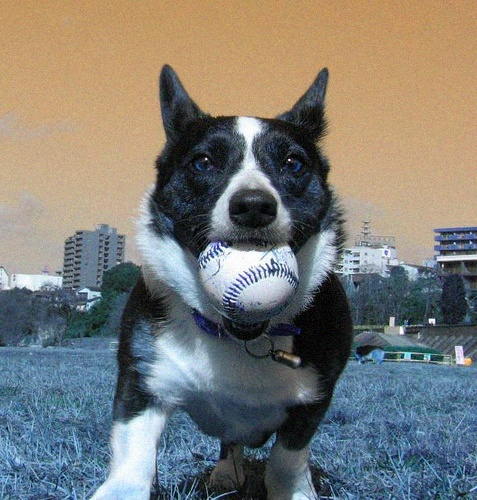

In [28]:
image

In [33]:
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [10]:
model = AutoModelForCausalLM.from_pretrained('/content/drive/MyDrive/new/100_model')

In [18]:
image = Image.open(img_file_dir[2])
device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, return_tensors="pt").to('cpu')
pixel_values = inputs.pixel_values

In [19]:
device

'cuda'

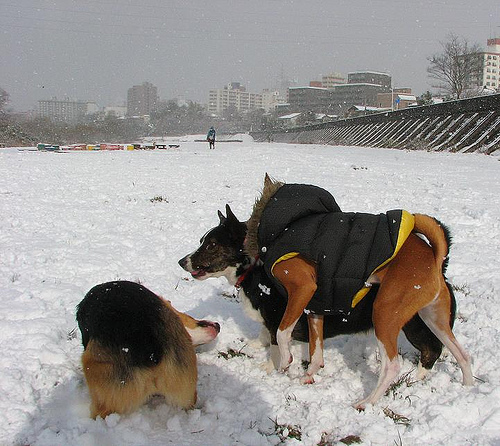

In [20]:
image

In [21]:
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

three dogs playing in the snow, with a city in the background.
